From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-view?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/Iris Data.csv')
X = data.iloc[:,[1,2,3,4]].values

In [4]:
data['Species'].value_counts() #To know, into how many categories species are classified.

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**K Means Clustering**

Using Elbow Method to find optimal number of Clusters

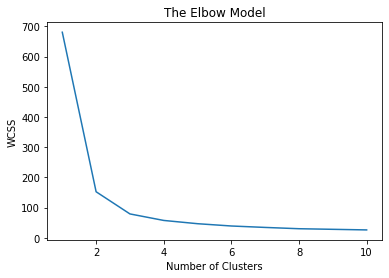

In [6]:
from sklearn.cluster import KMeans
wcss = []  #Within Cluster Sum Square
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0 )
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

#Plotting the Result
plt.plot(range(1,11), wcss)
plt.title('The Elbow Model')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimum clusters is where you find that kink in the above graph. 
From this we can choose the number of clusters as 3.



---

Apply K Means Clustering to the Dataset

In [7]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=None)
y_kmeans = kmeans.fit_predict(X)

Visualizing the Clusters

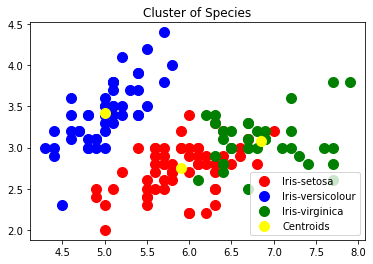

In [8]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')

plt.title('Cluster of Species')
plt.legend()
plt.show()

**Hierarchial Clustering**

Here we will use dendrogram for the Optimal number of Clusters

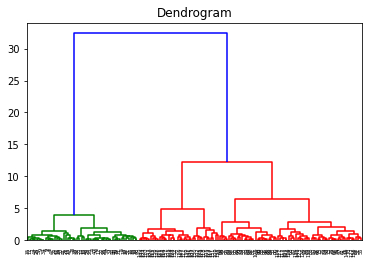

In [9]:
import scipy.cluster.hierarchy as sch
dd = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.show()

From above dendrogram also, we can conclude that Optimal number of Clusters would be 3



---